In [1]:
import matplotlib.pyplot as plt

In [2]:
from golftrainer import factory, geom, swing_analysis

In [3]:
json_fname = "../../data/00004.json"
gd = factory.create_golf_data(json_fname)

## Visual

Using package golftracker
```
display_golf_swing 00004.pkl
```

* Backswing is from 0 to 260
* Transition A is from 261 to 326
* Transition B is from 326 to 361
* Downswing is from 361 to 401  (Impact is at 400)
* Finish is from 401 to end
  

In [4]:
# Find the swing phases
analysis = swing_analysis.SwingAnalysis(gd)

In [7]:
phase_dict = analysis.swing_phases(ext_angle=70)
phase_dict

{'Backswing': [0, 405],
 'TransitA': None,
 'TransitB': None,
 'Downswing': None,
 'Finish': None}

In [16]:
df = gd.cart_data_frame()
df.columns

Index(['nose_x', 'nose_y', 'left_eye_inner_x', 'left_eye_inner_y',
       'left_eye_x', 'left_eye_y', 'left_eye_outer_x', 'left_eye_outer_y',
       'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_x', 'right_eye_y',
       'right_eye_outer_x', 'right_eye_outer_y', 'left_ear_x', 'left_ear_y',
       'right_ear_x', 'right_ear_y', 'mouth_left_x', 'mouth_left_y',
       'mouth_right_x', 'mouth_right_y', 'left_shoulder_x', 'left_shoulder_y',
       'right_shoulder_x', 'right_shoulder_y', 'left_elbow_x', 'left_elbow_y',
       'right_elbow_x', 'right_elbow_y', 'left_wrist_x', 'left_wrist_y',
       'right_wrist_x', 'right_wrist_y', 'left_pinky_x', 'left_pinky_y',
       'right_pinky_x', 'right_pinky_y', 'left_index_x', 'left_index_y',
       'right_index_x', 'right_index_y', 'left_thumb_x', 'left_thumb_y',
       'right_thumb_x', 'right_thumb_y', 'left_hip_x', 'left_hip_y',
       'right_hip_x', 'right_hip_y', 'left_knee_x', 'left_knee_y',
       'right_knee_x', 'right_knee_y', 'left_an

In [17]:
club_df = gd.point_xy_data_frame(df, col_name="club_head")

In [18]:
club_df.shape

(500, 2)

In [20]:
def calculate_directions(df):
    # Calculate differences in 'x' and 'y'
    df['delta_x'] = df['x'].diff()
    df['delta_y'] = df['y'].diff()

    # Function to encode direction
    def encode_direction(delta):
        if delta > 0:
            return +1
        elif delta < 0:
            return -1
        else:
            return 0

    # Apply the function to 'delta_x' and 'delta_y' and combine the results
    directions = list(df['delta_x'].apply(encode_direction))

    return directions

In [23]:
directions = calculate_directions(club_df)

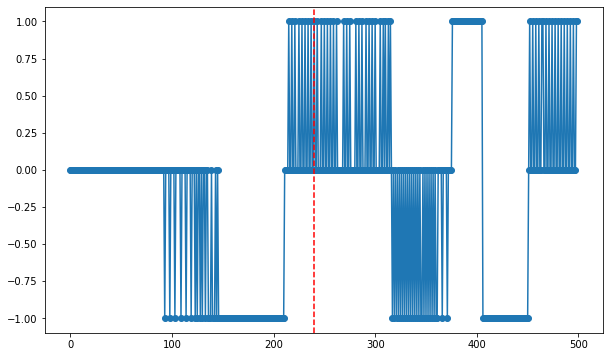

In [26]:
y_values = directions
x_values = range(len(y_values))
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.axvline(x=240, color='r', linestyle='--', label='backswing')